# Определение перспективного тарифа для телеком-компании

`Суть проекта` - Даны данные компании "Мегалайн", имеется два тарифа: "Смарт" и "Ультра". Требуется подготовиться данные, и провести анализ.

`Конечная цель проекта` - Проверить две гипотезы: 
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортирую библиотеки

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import datetime

Открываю файлы с данными и изучаю информацию

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

In [3]:
display(data_calls.head(), data_calls.info())
display(data_internet.head(), data_internet.info())
display(data_messages.head(), data_messages.info())
display(data_tariffs.head(), data_tariffs.info())
display(data_users.head(), data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


None

Всего имеется 500 клиентов, нужно будет сделать замену типа данных у всех столбцов отображающих какую-либо дату и время.

## Шаг 2. Подготовьте данные

- Приведите данные к нужным типам

In [4]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

- Найдите и исправьте ошибки в данных, если они есть.

In [5]:
print('Количество пропущенных звонков: ', data_calls.loc[data_calls['duration'] == 0, 'duration'].count())
print('Доля пропущенных звонков от всей выборки: ', data_calls.loc[data_calls['duration'] == 0, 'duration'].count()/data_calls['duration'].count())

Количество пропущенных звонков:  39613
Доля пропущенных звонков от всей выборки:  0.19551644316336553


In [6]:
data_calls['month'] = data_calls['call_date'].dt.month #Добавил столбец с месяцем
display(data_calls)
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [7]:
print(data_calls.duplicated().sum())
print(data_internet.duplicated().sum())
print(data_messages.duplicated().sum())
print(data_tariffs.duplicated().sum())
print(data_users.duplicated().sum())

0
0
0
0
0


Явных дубликатов не обнаружил

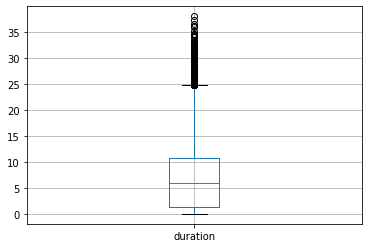

In [8]:
data_calls.boxplot(['duration'])
plt.show()

Выбросы начинаются от 25 минуты, однако такие звонки вполне возможны. Трогать их не будем.

- Количество сделанных звонков и израсходованных минут разговора по месяцам

In [9]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls.loc[data_calls['duration'] == 0, 'duration'] = 1
#data_internet['mb_used'] = np.round(data_internet['mb_used'], -3)
#display(data_internet['mb_used'].value_counts())

In [10]:
count_calls_month = data_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='count')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"]
count_calls_month.columns = ["count_calls_"+month for month in months]
count_calls_month = count_calls_month.reset_index()
display(count_calls_month.head(3))

,user_id,count_calls_Jan,count_calls_Feb,count_calls_Mar,count_calls_Apr,count_calls_May,count_calls_Jun,count_calls_Jul,count_calls_Aug,count_calls_Sep,count_calls_Oct,count_calls_Nov,count_calls_Dec
0,1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
2,1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0


In [11]:
sum_calls_month = data_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum')
sum_calls_month.columns = ["sum_calls_"+month for month in months]
sum_calls_month = sum_calls_month.reset_index()
display(sum_calls_month.head(3))

,user_id,sum_calls_Jan,sum_calls_Feb,sum_calls_Mar,sum_calls_Apr,sum_calls_May,sum_calls_Jun,sum_calls_Jul,sum_calls_Aug,sum_calls_Sep,sum_calls_Oct,sum_calls_Nov,sum_calls_Dec
0,1000,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.0,430.0
2,1002,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,250.0,242.0


- количество отправленных сообщений по месяцам

In [12]:
count_messages_month = data_messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count')
count_messages_month.columns = ["count_messages_"+month for month in months]
count_messages_month = count_messages_month.reset_index()
display(count_messages_month.head(3))

,user_id,count_messages_Jan,count_messages_Feb,count_messages_Mar,count_messages_Apr,count_messages_May,count_messages_Jun,count_messages_Jul,count_messages_Aug,count_messages_Sep,count_messages_Oct,count_messages_Nov,count_messages_Dec
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0


- объем израсходованного интернет-трафика по месяцам

In [13]:
sum_internet_month = data_internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum')
sum_internet_month.columns = ["sum_internet_"+month for month in months]
sum_internet_month = sum_internet_month.reset_index()
display(sum_internet_month.head(3))

,user_id,sum_internet_Jan,sum_internet_Feb,sum_internet_Mar,sum_internet_Apr,sum_internet_May,sum_internet_Jun,sum_internet_Jul,sum_internet_Aug,sum_internet_Sep,sum_internet_Oct,sum_internet_Nov,sum_internet_Dec
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73


- Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [14]:
profit = sum_calls_month.merge(sum_internet_month, on='user_id', how='outer')
profit = profit.merge(count_messages_month, on='user_id', how='outer')
profit = profit.merge(data_users[['user_id','tariff']], on='user_id', how='left')
limit = {
    # Включено в стоимость тарифа [message, internet, minute]
    "smart" : [50, 15360, 500],
    "ultra" : [1000, 30720, 3000]
}
prices = {
    # Стоимость дополнительной услуги [message, internet, minute]
    "smart" : [3, (200), 3],
    "ultra" : [1, (150), 1]
}
fee = {
    # Стоимость тарифа
    "smart" : 550,
    "ultra" : 3000
}
def income_counter(row):
    user_tariff = row['tariff'] 
    minutes = row["sum_calls_"+month]
    megabytes = row["sum_internet_"+month]
    messages = row["count_messages_"+month]
    
    minutes_minus_limit_price = (minutes - limit[user_tariff][2])*prices[user_tariff][2]
    if minutes_minus_limit_price < 0:
        minutes_minus_limit_price = 0
        
    megabytes = megabytes / 1024
    megabytes = np.ceil(megabytes)
    limit[user_tariff][1] = limit[user_tariff][1] / 1024
    if (megabytes - limit[user_tariff][1]) > 0:
        megabytes_minus_limit_price = (megabytes - limit[user_tariff][1])*prices[user_tariff][1]
    else:
        megabytes_minus_limit_price = 0
        
    messages_minus_limit_price = (messages - limit[user_tariff][0])*prices[user_tariff][0]
    if messages_minus_limit_price < 0:
        messages_minus_limit_price = 0
        
    return minutes_minus_limit_price + megabytes_minus_limit_price + messages_minus_limit_price + fee[user_tariff]

for month in months:
    profit['profit_'+month] = 0
for month in months:
    profit["profit_"+month] = profit.apply(income_counter, axis=1)
display(profit)

,user_id,sum_calls_Jan,sum_calls_Feb,sum_calls_Mar,sum_calls_Apr,sum_calls_May,sum_calls_Jun,sum_calls_Jul,sum_calls_Aug,sum_calls_Sep,...,profit_Mar,profit_Apr,profit_May,profit_Jun,profit_Jul,profit_Aug,profit_Sep,profit_Oct,profit_Nov,profit_Dec
0,1000,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,...,NaN,NaN,3450.0,6450.0,5100.0,5100.0,5250.0,5250.0,5250.0,4500.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,...,NaN,NaN,NaN,2750.0,4150.0,4550.0,3950.0,3350.0,4350.0,4150.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,...,NaN,NaN,NaN,NaN,NaN,4350.0,4950.0,5250.0,4800.0,4500.0
4,1004,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,...,NaN,NaN,5100.0,5700.0,6300.0,7200.0,5250.0,5850.0,5400.0,5700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,1231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сделал функцию для выручки которая берет из `profit` ряд и возвращает выручку для пользователя

## Шаг 3. Проанализируйте данные

Сначала проанализируем по тарифу `Smart`:

In [15]:
smart = profit[profit['tariff'] == 'smart'].replace(0, np.NaN).fillna(0)
display(smart)

,user_id,sum_calls_Jan,sum_calls_Feb,sum_calls_Mar,sum_calls_Apr,sum_calls_May,sum_calls_Jun,sum_calls_Jul,sum_calls_Aug,sum_calls_Sep,...,profit_Mar,profit_Apr,profit_May,profit_Jun,profit_Jul,profit_Aug,profit_Sep,profit_Oct,profit_Nov,profit_Dec
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,118.0,219.0,294.0,217.0,...,0.0,0.0,0.0,2750.0,4150.0,4550.0,3950.0,3350.0,4350.0,4150.0
5,1005,99.0,470.0,620.0,736.0,606.0,623.0,584.0,626.0,488.0,...,3128.0,3258.0,2468.0,2919.0,2420.0,2570.0,1956.0,2885.0,3339.0,2701.0
6,1006,0.0,42.0,296.0,365.0,381.0,483.0,327.0,285.0,367.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1007,0.0,0.0,0.0,202.0,490.0,558.0,589.0,483.0,674.0,...,0.0,2150.0,4150.0,3524.0,4017.0,4750.0,3672.0,3550.0,4032.0,3150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1496,49.0,606.0,569.0,536.0,497.0,572.0,592.0,553.0,496.0,...,5757.0,4858.0,5350.0,4766.0,5626.0,5309.0,5950.0,6150.0,6078.0,4852.0
489,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2968.0,3350.0,4724.0
490,1498,0.0,0.0,0.0,0.0,0.0,0.0,178.0,414.0,477.0,...,0.0,0.0,0.0,0.0,2150.0,5386.0,4950.0,4750.0,0.0,0.0
491,1499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,950.0,4150.0,4549.0,3213.0


Начнем со звонков:

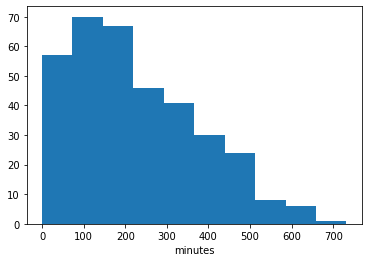

Среднее: 227.91571428571427
Дисперсия: 22392.432106699416
Стандартное откл.: 149.64101077812666


In [16]:
calls_smart = smart.loc[:,'sum_calls_Jan': 'sum_calls_Dec']
internet_smart = smart.loc[:,'sum_internet_Jan': 'sum_internet_Dec']
messages_smart = smart.loc[:,'count_messages_Jan': 'count_messages_Dec']
#for column in calls_smart.columns.values.tolist():
#    plt.hist(calls_smart[column], range=(1,1000), alpha=0.3)
calls_smart['mean_value'] = calls_smart.apply(pd.DataFrame.mean, axis=1) 
plt.hist(calls_smart['mean_value'])
plt.xlabel('minutes')
plt.show()
print("Среднее:", calls_smart['mean_value'].mean())
print("Дисперсия:", calls_smart['mean_value'].var())
print("Стандартное откл.:", calls_smart['mean_value'].std())


Судя по графику и полученным данным, в среднем пользователи тратят 227 минут на разговор по телефону в месяц, при этом им изначально доступно 500 минут. Проанализируем сообщения.

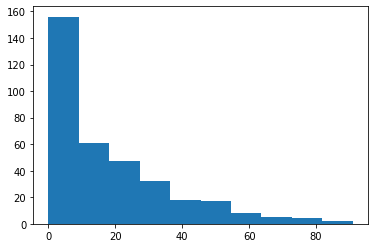

Среднее: 17.717380952380953
Дисперсия: 346.23916297130125
Стандартное откл.: 18.607502867695633


In [17]:
#for column in messages_smart.columns.values.tolist():
#    plt.hist(messages_smart[column], alpha=0.3)
messages_smart['mean_value'] = messages_smart.apply(pd.DataFrame.mean, axis=1)
plt.hist(messages_smart['mean_value'])
plt.show()
print("Среднее:", messages_smart['mean_value'].mean())
print("Дисперсия:", messages_smart['mean_value'].var())
print("Стандартное откл.:", messages_smart['mean_value'].std())

Ситуация похожа на ситуацию со звонками: В среднем пользователи тратят 17 сообщений в месяц и при этом изначально имеется 50 сообщений. Проанализиурем интернет трафик.

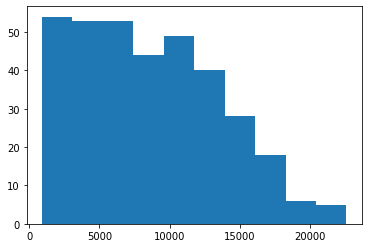

Среднее: 8602.022523809525
Дисперсия: 25160576.363007143
Стандартное откл.: 5016.031934009905


In [18]:
#for column in internet_smart.columns.values.tolist():
#    plt.hist(internet_smart[column], alpha=0.3)
internet_smart['mean_value'] = internet_smart.apply(pd.DataFrame.mean, axis=1)
plt.hist(internet_smart['mean_value'])
plt.show()
print("Среднее:", internet_smart['mean_value'].mean())
print("Дисперсия:", internet_smart['mean_value'].var())
print("Стандартное откл.:", internet_smart['mean_value'].std())

С интернетом ситуация отличается. Так, пользователи используют интернет в размере 8602 из 15360 доступных каждый месяц, видимо в этом тарифе больше всего пользователей привлекает использование интернета, нежели мобильная связь или СМС.

Теперь посмотрим статистику по тарифу `Ultra` 

In [19]:
ultra = profit[profit['tariff'] == 'ultra'].replace(0, np.NaN)
calls_ultra = ultra.loc[:,'sum_calls_Jan': 'sum_calls_Dec']
internet_ultra = ultra.loc[:,'sum_internet_Jan': 'sum_internet_Dec']
messages_ultra = ultra.loc[:,'count_messages_Jan': 'count_messages_Dec']


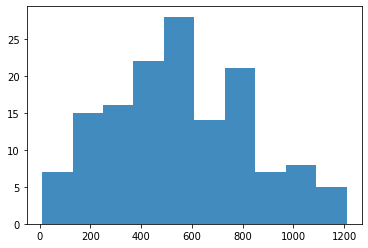

Среднее: 561.3476288862653
Дисперсия: 75779.191502742
Стандартное откл.: 275.2802054321051


In [20]:
#for column in calls_ultra.columns.values.tolist():
#    plt.hist(calls_ultra[column], range=(1,1000), alpha=0.3)
calls_ultra['mean_value'] = calls_ultra.apply(pd.DataFrame.mean, axis=1)
plt.hist(calls_ultra['mean_value'], alpha=0.85)
plt.show()
print("Среднее:", calls_ultra['mean_value'].mean())
print("Дисперсия:", calls_ultra['mean_value'].var())
print("Стандартное откл.:", calls_ultra['mean_value'].std())

В среднем пользователи тратят 561 минут на звонки в месяц из 3000 доступных, из чего следует что пользователи не особо часто пользуются данной услугой. Теперь посмотрим сообщения.

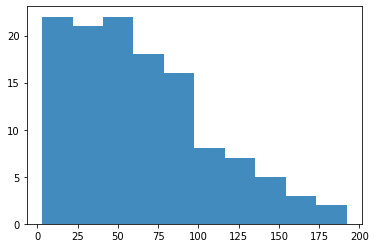

Среднее: 64.55580197132616
Дисперсия: 1882.7452175564713
Стандартное откл.: 43.390612090133864


In [21]:
#for column in messages_ultra.columns.values.tolist():
#    plt.hist(messages_ultra[column], alpha=0.3)
messages_ultra['mean_value'] = messages_ultra.apply(pd.DataFrame.mean, axis=1)
plt.hist(messages_ultra['mean_value'], alpha=0.85)
plt.show()
print("Среднее:", messages_ultra['mean_value'].mean())
print("Дисперсия:", messages_ultra['mean_value'].var())
print("Стандартное откл.:", messages_ultra['mean_value'].std())

Пользователи в среднем отправляют 64 сообщения из 1000 доступных, что говорит о крайне низкой востребованности данной услуги.

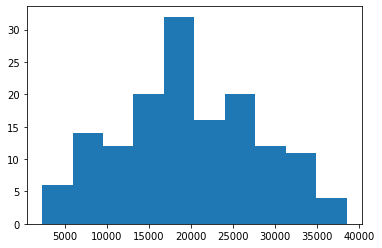

Среднее: 19744.083245172817
Дисперсия: 66748034.266566396
Стандартное откл.: 8169.9470173659265


In [22]:
#for column in internet_ultra.columns.values.tolist():
#    plt.hist(internet_ultra[column], alpha=0.3)
internet_ultra['mean_value'] = internet_ultra.apply(pd.DataFrame.mean, axis=1)
plt.hist(internet_ultra['mean_value'])
plt.show()
print("Среднее:", internet_ultra['mean_value'].mean())
print("Дисперсия:", internet_ultra['mean_value'].var())
print("Стандартное откл.:", internet_ultra['mean_value'].std())

По интернету картина более приятная, из 30000 мегабайт пользователи в среднем используют 19744, что в принципе нормально и говорит о высокой востребованности данной услуги.

## Шаг 4. Проверьте гипотезы.

- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

H0 - Средняя выручка пользователей тарифов не отличается<br>
H1 - Отличается

In [23]:
profit['mean_profit'] = profit.loc[:,'profit_Jan':'profit_Dec'].apply(pd.DataFrame.mean, axis=1)

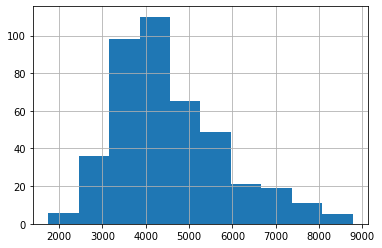

In [24]:
profit['mean_profit'].hist()
plt.show()

Видно два пика: При значении 500 и 3000, соответственно многие клиенты укладываются в предоставленные лимиты по услугам

In [25]:
profit1 = profit.loc[:,'profit_Jan':'profit_Dec']
profit_good = pd.concat([profit1, profit['tariff']], axis=1)
profit_good_smart = profit_good[profit_good['tariff']=='smart'].loc[:,'profit_Jan':'profit_Dec']
profit_good_smart['mean_profit'] = profit_good_smart.apply(pd.DataFrame.mean, axis=1)
profit_good_ultra = profit_good[profit_good['tariff']=='ultra'].loc[:,'profit_Jan':'profit_Dec']
profit_good_ultra['mean_profit'] = profit_good_ultra.apply(pd.DataFrame.mean, axis=1)

alpha = .05

results = st.ttest_ind(profit_good_smart['mean_profit'].dropna(), profit_good_ultra['mean_profit'].dropna(), equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза отвергается в пользу первой")
else:
    print("Нулевая гипотеза не отвергается")

p-значение: 1.8320217457315239e-34
Нулевая гипотеза отвергается в пользу первой


Нулевая гипотеза отвергнута, что означает, что средняя выручка пользователей в двух тарифах отличается.

- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0 - Выручка пользователей из Москвы не отличается<br>
H1 - Отличается

In [26]:
columns = ['user_id', 'profit_Jan', 'profit_Feb',
       'profit_Mar', 'profit_Apr', 'profit_May', 'profit_Jun',
       'profit_Jul', 'profit_Aug', 'profit_Sep', 'profit_Oct',
       'profit_Nov', 'profit_Dec']
profit_cities = profit[columns]
profit_cities = profit_cities.merge(data_users.loc[:,['user_id', 'city']], on='user_id', how='left')
profit_cities['mean_profit'] = profit_cities.apply(lambda row: np.mean(row[1:-1]), axis=1)

profit_cities_moscow = profit_cities[profit_cities['city'] == 'Москва']
profit_cities_other = profit_cities[profit_cities['city'] != 'Москва']

alpha = .05
results = (
    st.ttest_ind(
        profit_cities_moscow['mean_profit'].dropna(), 
        profit_cities_other['mean_profit'].dropna(), 
        equal_var=False)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза отвергается в пользу первой")
else:
    print("Нулевая гипотеза не отвергается")

p-значение: 0.2963692366143092
Нулевая гипотеза не отвергается


Нулевая гипотеза не отвергнута, что означает, что выручка пользователей из Москвы и из других регионов не отличается.

## Шаг 5. Напишите общий вывод.

Таким образом, нами были рассмотрены распределения длительности звонков, количества сообщений, объема израсходованного интернет трафика.
В среднем, пользователи часто не используют все предоставленные услуги тарифа ultra и, соответственно, переплачивают. Им было бы выгоднее использовать тариф smart.

- Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета.
- Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.
- Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах.